In [8]:
import pandas as pd

dados = pd.read_csv("jogos_com_clima_brasileirao_21_ate_24.csv")

dados

,Unnamed: 0,Ano,Mandante,Visitante,Placar,Data,Hora,Estádio,Cidade,Jogo,Rodada,Temperatura (°C),Umidade (%),Precipitação (mm),Vento (km/h)
0,0,2021,Flamengo - RJ,Palmeiras - SP,1 x 0,30/05/2021,16:00,Maracanã,Rio de Janeiro,1,1,22.3,93,0.0,1.8
1,1,2021,Corinthians - SP,Atlético - GO,0 x 1,30/05/2021,18:15,Neo Química Arena,Sao Paulo,2,1,18.4,93,0.0,2.9
2,2,2021,São Paulo - SP,Fluminense - RJ,0 x 0,29/05/2021,21:00,Morumbi,Sao Paulo,3,1,18.4,93,0.0,2.9
3,3,2021,Atlético Mineiro - MG,Fortaleza - CE,1 x 2,30/05/2021,11:00,Mineirão,Belo Horizonte,4,1,20.5,74,0.0,3.1
4,4,2021,Internacional - RS,Sport - PE,2 x 2,30/05/2021,20:30,Beira-Rio,Porto Alegre,5,1,21.1,87,0.0,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1515,2024,Palmeiras - SP,Fluminense - RJ,0 x 1,08/12/2024,16:00,Allianz Parque,Sao Paulo,376,38,18.4,93,0.0,2.9
1516,1516,2024,Red Bull Bragantino - SP,Criciúma - SC,5 x 1,08/12/2024,16:00,Nabi Abi Chedid,Braganca Paulista,377,38,17.4,93,0.0,3.7
1517,1517,2024,Fortaleza - CE,Internacional - RS,3 x 0,08/12/2024,16:00,Arena Castelão,Fortaleza,378,38,26.6,89,0.8,7.2
1518,1518,2024,Cuiabá Saf - MT,Vasco da Gama S.a.f. - RJ,1 x 2,08/12/2024,16:00,Arena Pantanal,Cuiaba,379,38,25.9,85,0.8,2.5


In [11]:
dados.drop(['Unnamed: 0', 'Precipitação (mm)'], axis=1, inplace=True, errors='ignore')
dados

,Ano,Mandante,Visitante,Placar,Data,Hora,Estádio,Cidade,Jogo,Rodada,Temperatura (°C),Umidade (%),Vento (km/h)
0,2021,Flamengo - RJ,Palmeiras - SP,1 x 0,30/05/2021,16:00,Maracanã,Rio de Janeiro,1,1,22.3,93,1.8
1,2021,Corinthians - SP,Atlético - GO,0 x 1,30/05/2021,18:15,Neo Química Arena,Sao Paulo,2,1,18.4,93,2.9
2,2021,São Paulo - SP,Fluminense - RJ,0 x 0,29/05/2021,21:00,Morumbi,Sao Paulo,3,1,18.4,93,2.9
3,2021,Atlético Mineiro - MG,Fortaleza - CE,1 x 2,30/05/2021,11:00,Mineirão,Belo Horizonte,4,1,20.5,74,3.1
4,2021,Internacional - RS,Sport - PE,2 x 2,30/05/2021,20:30,Beira-Rio,Porto Alegre,5,1,21.1,87,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2024,Palmeiras - SP,Fluminense - RJ,0 x 1,08/12/2024,16:00,Allianz Parque,Sao Paulo,376,38,18.4,93,2.9
1516,2024,Red Bull Bragantino - SP,Criciúma - SC,5 x 1,08/12/2024,16:00,Nabi Abi Chedid,Braganca Paulista,377,38,17.4,93,3.7
1517,2024,Fortaleza - CE,Internacional - RS,3 x 0,08/12/2024,16:00,Arena Castelão,Fortaleza,378,38,26.6,89,7.2
1518,2024,Cuiabá Saf - MT,Vasco da Gama S.a.f. - RJ,1 x 2,08/12/2024,16:00,Arena Pantanal,Cuiaba,379,38,25.9,85,2.5


In [14]:
print(dados.columns)


Index(['Ano', 'Mandante', 'Visitante', 'Placar', 'Data', 'Hora', 'Estádio',
       'Cidade', 'Jogo', 'Rodada', 'Temperatura (°C)', 'Umidade (%)',
       'Vento (km/h)'],
      dtype='object')


Análise completa

In [1]:
import pandas as pd

# Função para converter o valor de 'Placar' em gols do Mandante e do Visitante
def parse_placar(placar):
    """
    Converte o valor da coluna 'Placar' em gols do Mandante e do Visitante.
    Suporta os formatos 'x-y' e 'x x y' (por exemplo, "1-0" ou "1 x 0").
    """
    # Verifica se o placar contém o delimitador "-"
    if '-' in placar:
        parts = placar.split('-')
    # Caso contrário, tenta verificar o delimitador "x" (independente de maiúsculas/minúsculas)
    elif 'x' in placar.lower():
        parts = placar.lower().split('x')
    else:
        raise ValueError("Formato do placar não reconhecido: {}".format(placar))
    
    # Remove espaços em branco indesejados em cada parte
    parts = [p.strip() for p in parts]
    
    if len(parts) != 2:
        raise ValueError("Formato do placar não reconhecido: {}".format(placar))
    
    return int(parts[0]), int(parts[1])

# Carrega o dataset (já com as colunas removidas conforme solicitado)
dados = pd.read_csv("jogos_com_clima_brasileirao_21_ate_24.csv")

# Remove as colunas "Unnamed: 0" e "Precipitação (mm)", se ainda não foram removidas
dados.drop(['Unnamed: 0', 'Precipitação (mm)'], axis=1, inplace=True, errors='ignore')

# Extrai os gols do placar para criar as colunas 'Mandante_Gols' e 'Visitante_Gols'
dados[['Mandante_Gols', 'Visitante_Gols']] = dados['Placar'].apply(
    lambda x: pd.Series(parse_placar(x))
)

# Criação de novas colunas para armazenar os features dos últimos 3 jogos e a posição na tabela
novas_colunas = [
    'Mandante_3j_Saldo', 'Mandante_3j_Marcados', 'Mandante_3j_Sofridos', 'Mandante_Posicao',
    'Visitante_3j_Saldo', 'Visitante_3j_Marcados', 'Visitante_3j_Sofridos', 'Visitante_Posicao'
]
for col in novas_colunas:
    dados[col] = None  # ou pd.NA

# =============================================================================
# Função para calcular a classificação (standings) com base nos dados acumulados
def compute_standings(team_stats):
    """
    team_stats: dicionário com estatísticas de cada time,
    onde cada time possui: pontos, saldo de gols (goal_diff) e gols marcados.
    
    Ordena os times por pontos, saldo e gols marcados (ordem decrescente) e
    retorna um DataFrame com a tabela.
    """
    df = pd.DataFrame.from_dict(team_stats, orient='index')
    # Ordenação simples: pontos, saldo e gols marcados (todos decrescente)
    df = df.sort_values(['points', 'goal_diff', 'goals_scored'], ascending=False)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'team'}, inplace=True)
    # A posição será a ordem no DataFrame (1-indexado)
    df['posicao'] = range(1, len(df) + 1)
    return df

# =============================================================================
# Função para processar uma temporada (um grupo por 'Ano')
def process_season(season_df):
    """
    Para cada partida desta temporada, calcula as estatísticas dos últimos 3 jogos
    de cada time (Mandante e Visitante) e a posição na tabela acumulada.
    """
    # Inicializa dicionários para armazenar estatísticas e histórico de resultados.
    team_stats = {}
    team_history = {}
    
    # Identifica todos os times que aparecem como Mandante e Visitante
    teams = pd.unique(season_df['Mandante'].tolist() + season_df['Visitante'].tolist())
    for team in teams:
        team_stats[team] = {'points': 0, 'goal_diff': 0, 'goals_scored': 0, 'goals_conceded': 0}
        team_history[team] = []  # Cada elemento será uma tupla: (gols_marcados, gols_sofridos)
        
    # Garante que o DataFrame da temporada esteja ordenado pela rodada (ou Data)
    season_df = season_df.sort_values(by='Rodada')
    
    # Percorre cada partida da temporada, na ordem das rodadas
    for idx, row in season_df.iterrows():
        mandante = row['Mandante']
        visitante = row['Visitante']
        mand_goals = row['Mandante_Gols']
        visit_goals = row['Visitante_Gols']
        
        # -----------------------------------------------------------
        # Cálculo dos features dos últimos 3 jogos para cada time:
        # -----------------------------------------------------------
        # Para o Mandante:
        hist_mand = team_history[mandante]
        if len(hist_mand) > 0:
            # Pega os últimos 3 jogos (se houver menos, pega o que estiver disponível)
            last3 = hist_mand[-3:]
            mandante_marcados = sum(r[0] for r in last3)
            mandante_sofridos = sum(r[1] for r in last3)
            mandante_saldo = mandante_marcados - mandante_sofridos
        else:
            mandante_marcados = 0
            mandante_sofridos = 0
            mandante_saldo = 0
        
        # Para o Visitante:
        hist_visit = team_history[visitante]
        if len(hist_visit) > 0:
            last3 = hist_visit[-3:]
            visitante_marcados = sum(r[0] for r in last3)
            visitante_sofridos = sum(r[1] for r in last3)
            visitante_saldo = visitante_marcados - visitante_sofridos
        else:
            visitante_marcados = 0
            visitante_sofridos = 0
            visitante_saldo = 0
        
        # -----------------------------------------------------------
        # Determinar a posição dos times na tabela até este momento
        standings = compute_standings(team_stats)
        
        # Para o Mandante:
        if mandante in standings['team'].values:
            mandante_pos = standings.loc[standings['team'] == mandante, 'posicao'].values[0]
        else:
            mandante_pos = len(standings) + 1  # Se ainda não tiver jogado, posição abaixo de quem já jogou
        
        # Para o Visitante:
        if visitante in standings['team'].values:
            visitante_pos = standings.loc[standings['team'] == visitante, 'posicao'].values[0]
        else:
            visitante_pos = len(standings) + 1
        
        # -----------------------------------------------------------
        # Armazena os valores calculados no DataFrame
        season_df.at[idx, 'Mandante_3j_Saldo'] = mandante_saldo
        season_df.at[idx, 'Mandante_3j_Marcados'] = mandante_marcados
        season_df.at[idx, 'Mandante_3j_Sofridos'] = mandante_sofridos
        season_df.at[idx, 'Mandante_Posicao'] = mandante_pos
        
        season_df.at[idx, 'Visitante_3j_Saldo'] = visitante_saldo
        season_df.at[idx, 'Visitante_3j_Marcados'] = visitante_marcados
        season_df.at[idx, 'Visitante_3j_Sofridos'] = visitante_sofridos
        season_df.at[idx, 'Visitante_Posicao'] = visitante_pos
        
        # -----------------------------------------------------------
        # Atualiza os stats acumulados de cada time com o resultado da partida
        # 1) Atualizar pontos:
        if mand_goals > visit_goals:
            team_stats[mandante]['points'] += 3
        elif mand_goals == visit_goals:
            team_stats[mandante]['points'] += 1
        if visit_goals > mand_goals:
            team_stats[visitante]['points'] += 3
        elif visit_goals == mand_goals:
            team_stats[visitante]['points'] += 1
        
        # 2) Atualizar saldo e gols:
        team_stats[mandante]['goal_diff'] += (mand_goals - visit_goals)
        team_stats[mandante]['goals_scored'] += mand_goals
        team_stats[mandante]['goals_conceded'] += visit_goals
        
        team_stats[visitante]['goal_diff'] += (visit_goals - mand_goals)
        team_stats[visitante]['goals_scored'] += visit_goals
        team_stats[visitante]['goals_conceded'] += mand_goals
        
        # 3) Armazenar o resultado da partida no histórico do time:
        team_history[mandante].append((mand_goals, visit_goals))
        team_history[visitante].append((visit_goals, mand_goals))
        
    return season_df

# =============================================================================
# Aplicação do processamento para cada temporada (por coluna 'Ano')
# -----------------------------------------------------------------------------
# Ordena o DataFrame pelo Ano e pela Rodada para manter a sequência cronológica.
dados.sort_values(by=['Ano', 'Rodada'], inplace=True)

# Processa cada temporada usando groupby e a função definida
dados_processados = dados.groupby('Ano', group_keys=False).apply(process_season)

# (Opcional) Converter as novas colunas para numérico, se necessário:
for col in novas_colunas:
    dados_processados[col] = pd.to_numeric(dados_processados[col])

# Exibe as 10 primeiras linhas do DataFrame processado
print(dados_processados.head(10))


C:\Users\msdof\AppData\Local\Temp\ipykernel_2480\1482694555.py:76: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  teams = pd.unique(season_df['Mandante'].tolist() + season_df['Visitante'].tolist())
C:\Users\msdof\AppData\Local\Temp\ipykernel_2480\1482694555.py:76: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  teams = pd.unique(season_df['Mandante'].tolist() + season_df['Visitante'].tolist())
C:\Users\msdof\AppData\Local\Temp\ipykernel_2480\1482694555.py:76: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  teams = pd.unique(season_df['Mandante'].tolist() + season_df['Visitante'].tolist())
C:\Users\msdof\AppData\Local\Temp\ipykernel_2480\1482694555.py:76: FutureWarning: unique with 

    Ano                   Mandante                 Visitante Placar  \
0  2021              Flamengo - RJ            Palmeiras - SP  1 x 0   
1  2021           Corinthians - SP             Atlético - GO  0 x 1   
2  2021             São Paulo - SP           Fluminense - RJ  0 x 0   
3  2021      Atlético Mineiro - MG            Fortaleza - CE  1 x 2   
4  2021         Internacional - RS                Sport - PE  2 x 2   
5  2021                 Ceará - CE               Grêmio - RS  3 x 2   
6  2021   Esporte Clube Bahia - BA            Santos Fc - SP  3 x 0   
7  2021  Athletico Paranaense - PR              America - MG  1 x 0   
8  2021           Chapecoense - SC  Red Bull Bragantino - SP  0 x 3   
9  2021            Cuiabá Saf - MT            Juventude - RS  2 x 2   

         Data   Hora            Estádio          Cidade  Jogo  Rodada  ...  \
0  30/05/2021  16:00           Maracanã  Rio de Janeiro     1       1  ...   
1  30/05/2021  18:15  Neo Química Arena       Sao Paulo     2 

C:\Users\msdof\AppData\Local\Temp\ipykernel_2480\1482694555.py:181: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dados_processados = dados.groupby('Ano', group_keys=False).apply(process_season)


Exportar csv

In [2]:
dados_processados.to_csv("brasileiro_variaveis_historicas.csv", index=False)
print("Arquivo 'brasileiro_variaveis_historicas.csv' salvo com sucesso.")

Arquivo 'brasileiro_variaveis_historicas.csv' salvo com sucesso.


Probabilidade bruta

In [2]:
import pandas as pd
df = pd.read_csv("brasileiro_variaveis_historicas.csv")
df

,Ano,Mandante,Visitante,Placar,Data,Hora,Estádio,Cidade,Jogo,Rodada,...,Mandante_Gols,Visitante_Gols,Mandante_3j_Saldo,Mandante_3j_Marcados,Mandante_3j_Sofridos,Mandante_Posicao,Visitante_3j_Saldo,Visitante_3j_Marcados,Visitante_3j_Sofridos,Visitante_Posicao
0,2021,Flamengo - RJ,Palmeiras - SP,1 x 0,30/05/2021,16:00,Maracanã,Rio de Janeiro,1,1,...,1,0,0,0,0,1,0,0,0,12
1,2021,Corinthians - SP,Atlético - GO,0 x 1,30/05/2021,18:15,Neo Química Arena,Sao Paulo,2,1,...,0,1,0,0,0,2,0,0,0,19
2,2021,São Paulo - SP,Fluminense - RJ,0 x 0,29/05/2021,21:00,Morumbi,Sao Paulo,3,1,...,0,0,0,0,0,3,0,0,0,11
3,2021,Atlético Mineiro - MG,Fortaleza - CE,1 x 2,30/05/2021,11:00,Mineirão,Belo Horizonte,4,1,...,1,2,0,0,0,5,0,0,0,15
4,2021,Internacional - RS,Sport - PE,2 x 2,30/05/2021,20:30,Beira-Rio,Porto Alegre,5,1,...,2,2,0,0,0,6,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2024,Botafogo - RJ,São Paulo - SP,2 x 1,08/12/2024,16:00,Nilton Santos,Rio de Janeiro,375,38,...,2,1,3,5,2,1,-2,4,6,6
1516,2024,Palmeiras - SP,Fluminense - RJ,0 x 1,08/12/2024,16:00,Allianz Parque,Sao Paulo,376,38,...,0,1,0,4,4,2,1,2,1,15
1517,2024,Red Bull Bragantino - SP,Criciúma - SC,5 x 1,08/12/2024,16:00,Nabi Abi Chedid,Braganca Paulista,377,38,...,5,1,-2,4,6,17,-5,2,7,18
1518,2024,Fortaleza - CE,Internacional - RS,3 x 0,08/12/2024,16:00,Arena Castelão,Fortaleza,378,38,...,3,0,-4,1,5,5,1,6,5,4


In [8]:
df.columns

Index(['Ano', 'Mandante', 'Visitante', 'Placar', 'Data', 'Hora', 'Estádio',
       'Cidade', 'Jogo', 'Rodada', 'Temperatura (°C)', 'Umidade (%)',
       'Vento (km/h)', 'Mandante_Gols', 'Visitante_Gols', 'Mandante_3j_Saldo',
       'Mandante_3j_Marcados', 'Mandante_3j_Sofridos', 'Mandante_Posicao',
       'Visitante_3j_Saldo', 'Visitante_3j_Marcados', 'Visitante_3j_Sofridos',
       'Visitante_Posicao', 'Mandante_Vence', 'Resultado'],
      dtype='object')

Probabilidade de vitória

In [5]:
import pandas as pd
import numpy as np
# 1) Cria coluna com o resultado da partida
df['Resultado'] = np.where(
    df['Mandante_Gols'] > df['Visitante_Gols'], 'Mandante vencer',
    np.where(df['Mandante_Gols'] == df['Visitante_Gols'], 'Empate', 'Visitante vencer')
)

# 2) Calcula as porcentagens por ano e resultado
prob_ano = (
    df
    .groupby('Ano')['Resultado']
    .value_counts(normalize=True)   # proporção dentro de cada ano
    .mul(100)                       # passa para porcentagem
    .round(2)                       # arredonda 2 casas
    .unstack(fill_value=0)         # transforma em colunas
    .rename(columns={
        'Mandante vencer': 'Mandante vencer (%)',
        'Empate':        'Empate (%)',
        'Visitante vencer': 'Visitante vencer (%)'
    })
    .reset_index()
)

# 3) Exibe o resultado de forma organizada
print(prob_ano.to_string(index=False))


 Ano  Empate (%)  Mandante vencer (%)  Visitante vencer (%)
2021       29.74                45.79                 24.47
2022       28.42                44.21                 27.37
2023       25.79                46.84                 27.37
2024       26.58                47.37                 26.05


In [9]:
import pandas as pd
import numpy as np

# 1) Já considerando que seu df possui a coluna 'Resultado' com valores
#    'Mandante vencer', 'Empate' e 'Visitante vencer'

# --- a) Percentuais de resultado por ano ---
pct = (
    df
    .groupby('Ano')['Resultado']
    .value_counts(normalize=True)      # proporção de cada resultado
    .mul(100)                          # converte para %
    .round(2)                          # arredonda
    .unstack(fill_value=0)            # transforma em colunas
    .rename(columns={
        'Mandante vencer': 'Mandante (%)',
        'Empate':         'Empate (%)',
        'Visitante vencer': 'Visitante (%)'
    })
)

# --- b) Médias de clima e performance por ano ---
stats = (
    df
    .groupby('Ano')
    .agg({
        'Temperatura (°C)':    'mean',
        'Umidade (%)':         'mean',
        'Vento (km/h)':        'mean',
        'Mandante_3j_Saldo':   'mean',
        'Mandante_3j_Marcados':'mean',
        'Mandante_3j_Sofridos':'mean',
        'Mandante_Posicao':    'mean',
        'Visitante_3j_Saldo':   'mean',
        'Visitante_3j_Marcados':'mean',
        'Visitante_3j_Sofridos':'mean',
        'Visitante_Posicao':    'mean'
    })
    .rename(columns={
        'Temperatura (°C)':     'Temp média (°C)',
        'Umidade (%)':          'Umid média (%)',
        'Vento (km/h)':         'Vento médio (km/h)',
        'Mandante_3j_Saldo':    'Mandante Δ3j médio',
        'Mandante_3j_Marcados': 'Mandante Gols3j méd.',
        'Mandante_3j_Sofridos': 'Mandante Sofr3j méd.',
        'Mandante_Posicao':     'Mandante Pos média',
        'Visitante_3j_Saldo':    'Visitante Δ3j médio',
        'Visitante_3j_Marcados': 'Visitante Gols3j méd.',
        'Visitante_3j_Sofridos': 'Visitante Sofr3j méd.',
        'Visitante_Posicao':     'Visitante Pos média'
    })
    .round(2)
)

# --- c) Combina tudo num único DataFrame e exibe bonito ---
result = pct.join(stats).reset_index()

print(result.to_string(index=False))


 Ano  Empate (%)  Mandante (%)  Visitante (%)  Temp média (°C)  Umid média (%)  Vento médio (km/h)  Mandante Δ3j médio  Mandante Gols3j méd.  Mandante Sofr3j méd.  Mandante Pos média  Visitante Δ3j médio  Visitante Gols3j méd.  Visitante Sofr3j méd.  Visitante Pos média
2021       29.74         45.79          24.47            21.41           87.69                5.29               -0.16                  3.07                  3.24               10.98                 0.16                   3.21                   3.05                10.92
2022       28.42         44.21          27.37            20.98           88.47                4.42               -0.26                  3.24                  3.50               11.21                 0.26                   3.47                   3.21                10.99
2023       25.79         46.84          27.37            21.17           87.95                4.65               -0.03                  3.54                  3.57               10.99     

In [10]:
import pandas as pd

# --- 1) Médias das variáveis climáticas por ano ---
climate_stats = (
    df
    .groupby('Ano')
    .agg({
        'Temperatura (°C)': 'mean',
        'Umidade (%)':      'mean',
        'Vento (km/h)':     'mean'
    })
    .rename(columns={
        'Temperatura (°C)': 'Temp média (°C)',
        'Umidade (%)':      'Umid média (%)',
        'Vento (km/h)':     'Vento médio (km/h)'
    })
    .round(2)
)

print("Médias das variáveis climáticas por ano:")
print(climate_stats.to_string())
print("\n")  # linha em branco só para separar visualmente

# --- 2) Médias dos indicadores de performance por ano ---
perf_stats = (
    df
    .groupby('Ano')
    .agg({
        'Mandante_3j_Saldo':    'mean',
        'Mandante_3j_Marcados': 'mean',
        'Mandante_3j_Sofridos': 'mean',
        'Mandante_Posicao':     'mean',
        'Visitante_3j_Saldo':    'mean',
        'Visitante_3j_Marcados': 'mean',
        'Visitante_3j_Sofridos': 'mean',
        'Visitante_Posicao':     'mean'
    })
    .rename(columns={
        'Mandante_3j_Saldo':    'Δ3j Mandante médio',
        'Mandante_3j_Marcados': 'Gols3j Mandante méd.',
        'Mandante_3j_Sofridos': 'Sofr3j Mandante méd.',
        'Mandante_Posicao':     'Pos Mandante médio',
        'Visitante_3j_Saldo':    'Δ3j Visitante médio',
        'Visitante_3j_Marcados': 'Gols3j Visitante méd.',
        'Visitante_3j_Sofridos': 'Sofr3j Visitante méd.',
        'Visitante_Posicao':     'Pos Visitante médio'
    })
    .round(2)
)

print("Médias dos indicadores de performance por ano:")
print(perf_stats.to_string())


Médias das variáveis climáticas por ano:
      Temp média (°C)  Umid média (%)  Vento médio (km/h)
Ano                                                      
2021            21.41           87.69                5.29
2022            20.98           88.47                4.42
2023            21.17           87.95                4.65
2024            21.26           88.44                4.72


Médias dos indicadores de performance por ano:
      Δ3j Mandante médio  Gols3j Mandante méd.  Sofr3j Mandante méd.  Pos Mandante médio  Δ3j Visitante médio  Gols3j Visitante méd.  Sofr3j Visitante méd.  Pos Visitante médio
Ano                                                                                                                                                                             
2021               -0.16                  3.07                  3.24               10.98                 0.16                   3.21                   3.05                10.92
2022               -0.26       

In [11]:
import pandas as pd

# Agrupa por ano e calcula a média de gols marcados e sofridos nos últimos 3 jogos
gols_3j = (
    df
    .groupby('Ano')
    .agg({
        'Mandante_3j_Marcados':   'mean',
        'Mandante_3j_Sofridos':   'mean',
        'Visitante_3j_Marcados':  'mean',
        'Visitante_3j_Sofridos':  'mean'
    })
    .rename(columns={
        'Mandante_3j_Marcados':  'Méd. Gols 3j Mandante',
        'Mandante_3j_Sofridos':  'Méd. Sofr. 3j Mandante',
        'Visitante_3j_Marcados': 'Méd. Gols 3j Visitante',
        'Visitante_3j_Sofridos': 'Méd. Sofr. 3j Visitante'
    })
    .round(2)
)

print("Gols marcados e sofridos (média últimos 3 jogos) por ano:")
print(gols_3j.to_string())


Gols marcados e sofridos (média últimos 3 jogos) por ano:
      Méd. Gols 3j Mandante  Méd. Sofr. 3j Mandante  Méd. Gols 3j Visitante  Méd. Sofr. 3j Visitante
Ano                                                                                                 
2021                   3.07                    3.24                    3.21                     3.05
2022                   3.24                    3.50                    3.47                     3.21
2023                   3.54                    3.57                    3.51                     3.48
2024                   3.40                    3.57                    3.50                     3.33


In [3]:
import pandas as pd

# Função para calcular o Resultado a partir do placar (1: vitória do mandante, 0: empate, -1: derrota)
def resultado_mandante(placar):
    try:
        gols_m, gols_v = map(int, placar.split(" x "))
        if gols_m > gols_v:
            return 1
        elif gols_m == gols_v:
            return 0
        else:
            return -1
    except Exception:
        return None

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Cria a variável Resultado e remove linhas com problemas
df["Resultado"] = df["Placar"].apply(resultado_mandante)
df = df.dropna(subset=["Resultado"])

# Filtra os jogos conforme as condições:
# - Saldo dos últimos 3 jogos do mandante igual a 1
# - Saldo dos últimos 3 jogos do visitante igual a 1
# - Classificação do visitante (Visitante_Posicao) melhor que a do mandante (Mandante_Posicao)
filtro = (
    (df["Mandante_3j_Saldo"] == 1) &
    (df["Visitante_3j_Saldo"] == 1) &
    (df["Visitante_Posicao"] < df["Mandante_Posicao"])
)
df_filtrado = df[filtro]

# Total de jogos filtrados
total_jogos = len(df_filtrado)

# Contagem dos resultados
cont_vit_mandante = (df_filtrado["Resultado"] == 1).sum()
cont_empate = (df_filtrado["Resultado"] == 0).sum()
cont_vit_visitante = (df_filtrado["Resultado"] == -1).sum()

# Cálculo das probabilidades (brutas), usando a frequência em que cada resultado ocorreu
prob_vit_mandante = cont_vit_mandante / total_jogos if total_jogos > 0 else 0
prob_empate = cont_empate / total_jogos if total_jogos > 0 else 0
prob_vit_visitante = cont_vit_visitante / total_jogos if total_jogos > 0 else 0

print("Total de jogos filtrados:", total_jogos)
print("Probabilidade de vitória do mandante:", prob_vit_mandante)
print("Probabilidade de empate:", prob_empate)
print("Probabilidade de vitória do visitante:", prob_vit_visitante)


Total de jogos filtrados: 15
Probabilidade de vitória do mandante: 0.2
Probabilidade de empate: 0.3333333333333333
Probabilidade de vitória do visitante: 0.4666666666666667


ANALISAR GOLEADA

In [1]:
import pandas as pd

# 1) Leitura e conversão de data
df = pd.read_csv("brasileiro_variaveis_historicas.csv", dayfirst=True)
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True, errors="coerce")

# 2) Base "long": uma linha por time por jogo
df_home = (
    df[["Mandante", "Mandante_Gols", "Data"]]
    .rename(columns={"Mandante": "Time", "Mandante_Gols": "Goals_For"})
)
df_away = (
    df[["Visitante", "Visitante_Gols", "Data"]]
    .rename(columns={"Visitante": "Time", "Visitante_Gols": "Goals_For"})
)
df_long = pd.concat([df_home, df_away], ignore_index=True)

# 3) Ordenar e criar flag de goleada
df_long = df_long.sort_values(["Time", "Data"])
df_long["Goleada"] = df_long["Goals_For"] >= 4

# 4) Identificar se a próxima partida do mesmo time também foi goleada
df_long["Next_Goleada"] = df_long.groupby("Time")["Goleada"].shift(-1)

# 5) Cálculo das probabilidades
mask = df_long["Goleada"]               # jogos que foram goleadas
N_iniciais = mask.sum()                
N_repetidas = df_long.loc[mask, "Next_Goleada"].sum()
P_repetir = N_repetidas / N_iniciais if N_iniciais > 0 else 0

print(f"Jogos com goleada inicial: {N_iniciais}")
print(f"Dessas, repetições na rodada seguinte: {N_repetidas}")
print(f"Probabilidade de repetir goleada: {P_repetir:.2%}")


Jogos com goleada inicial: 104
Dessas, repetições na rodada seguinte: 4
Probabilidade de repetir goleada: 3.85%


In [2]:
df = pd.read_csv("brasileiro_variaveis_historicas.csv", dayfirst=True)

df = df[df["Ano"].between(2021, 2024)]

# 2) Base "long" incluindo Ano e Rodada
df_home = (
    df[["Mandante", "Mandante_Gols", "Ano", "Rodada"]]
    .rename(columns={"Mandante": "Time", "Mandante_Gols": "Goals_For"})
)
df_away = (
    df[["Visitante", "Visitante_Gols", "Ano", "Rodada"]]
    .rename(columns={"Visitante": "Time", "Visitante_Gols": "Goals_For"})
)
df_long = pd.concat([df_home, df_away], ignore_index=True)

# 3) Ordenação por Time, Ano, Rodada e marcação de goleada
df_long = df_long.sort_values(["Time", "Ano", "Rodada"])
df_long["Goleada"] = df_long["Goals_For"] >= 4

# 4) Próxima rodada dentro da mesma temporada
df_long["Next_Goleada"] = df_long.groupby(["Time", "Ano"])["Goleada"].shift(-1)

# 5) Cálculo das probabilidades
mask = df_long["Goleada"]
N_iniciais = mask.sum()
N_repetidas = df_long.loc[mask, "Next_Goleada"].sum()
P_repetir = N_repetidas / N_iniciais if N_iniciais > 0 else 0

print(f"Temporadas 2021–2024")
print(f"Jogos com goleada inicial: {N_iniciais}")
print(f"Dessas, repetições na rodada seguinte: {N_repetidas}")
print(f"Probabilidade de repetir goleada: {P_repetir:.2%}")

Temporadas 2021–2024
Jogos com goleada inicial: 104
Dessas, repetições na rodada seguinte: 4
Probabilidade de repetir goleada: 3.85%


In [4]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Filtro para selecionar apenas os jogos em que:
# - O saldo dos últimos 3 jogos do mandante é igual a 1
# - O saldo dos últimos 3 jogos do visitante é igual a 1
# - A classificação (posição) do visitante é melhor que a do mandante 
#   (ou seja, Visitante_Posicao < Mandante_Posicao, considerando que posição 1 é a melhor)
filtro = (
    (df["Mandante_3j_Saldo"] == 1) &
    (df["Visitante_3j_Saldo"] == 1) &
    (df["Visitante_Posicao"] < df["Mandante_Posicao"])
)
df_filtrado = df[filtro]

# Total de jogos que cumprem o filtro
total_jogos = len(df_filtrado)

# Contagem dos jogos em que o visitante marcou 4 ou mais gols
# (supomos que exista a coluna "Visitante_Gols")
jogos_4_gols_visitante = (df_filtrado["Visitante_Gols"] >= 4).sum()

# Cálculo da probabilidade (frequência)
probabilidade_4plus = jogos_4_gols_visitante / total_jogos if total_jogos > 0 else 0

print("Total de jogos filtrados:", total_jogos)
print("Número de jogos com 4 ou mais gols do visitante:", jogos_4_gols_visitante)
print("Probabilidade do visitante marcar 4 ou mais gols:", probabilidade_4plus)


Total de jogos filtrados: 15
Número de jogos com 4 ou mais gols do visitante: 1
Probabilidade do visitante marcar 4 ou mais gols: 0.06666666666666667


In [5]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Filtro para selecionar os jogos com:
# - Mandante_3j_Saldo igual a 1
# - Visitante_3j_Saldo igual a 1
# - Classificação do visitante melhor que a do mandante (menor valor indica melhor posição)
filtro = (
    (df["Mandante_3j_Saldo"] == 1) &
    (df["Visitante_3j_Saldo"] == 1) &
    (df["Visitante_Posicao"] < df["Mandante_Posicao"])
)
df_filtrado = df[filtro]

total_jogos = len(df_filtrado)

# Supondo que existam as colunas "Mandante_Gols" e "Visitante_Gols"
# Contamos os jogos em que a soma dos gols (mandante + visitante) é pelo menos 2
jogos_2_ou_mais = ((df_filtrado["Mandante_Gols"] + df_filtrado["Visitante_Gols"]) >= 2).sum()

# Cálculo da probabilidade
probabilidade_2oumais = jogos_2_ou_mais / total_jogos if total_jogos > 0 else 0

print("Total de jogos filtrados:", total_jogos)
print("Número de jogos com pelo menos 2 gols:", jogos_2_ou_mais)
print("Probabilidade da partida terminar com pelo menos 2 gols:", probabilidade_2oumais)


Total de jogos filtrados: 15
Número de jogos com pelo menos 2 gols: 10
Probabilidade da partida terminar com pelo menos 2 gols: 0.6666666666666666


In [8]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Aplica o filtro das condições especificadas:
# - Saldo dos últimos 3 jogos do mandante igual a 1
# - Saldo dos últimos 3 jogos do visitante igual a 1
# - A classificação do visitante é melhor que a do mandante (menor valor indica melhor posição)
filtro = (
    (df["Mandante_3j_Saldo"] == 1) &
    (df["Visitante_3j_Saldo"] == 1) &
    (df["Visitante_Posicao"] < df["Mandante_Posicao"])
)
df_filtrado = df[filtro]

total_jogos = len(df_filtrado)

# Contamos os jogos que terminaram com exatamente 0 gols para o mandante e 1 para o visitante.
# Supondo que as colunas "Mandante_Gols" e "Visitante_Gols" estão disponíveis.
jogos_0x1 = ((df_filtrado["Mandante_Gols"] == 0) & (df_filtrado["Visitante_Gols"] == 2)).sum()

# Cálculo da probabilidade
probabilidade_0x1 = jogos_0x1 / total_jogos if total_jogos > 0 else 0

print("Total de jogos filtrados:", total_jogos)
print("Número de jogos com resultado 0x2 para o visitante:", jogos_0x1)
print("Probabilidade do visitante ganhar por 0x2:", probabilidade_0x1)


Total de jogos filtrados: 15
Número de jogos com resultado 0x2 para o visitante: 0
Probabilidade do visitante ganhar por 0x2: 0.0


Contagem de 0 x 0 por temporada (Ano) e Rodada:
     Ano  Rodada  Count
0   2021       1      1
1   2021       3      2
2   2021       4      2
3   2021       5      1
4   2021       7      2
..   ...     ...    ...
84  2024      30      1
85  2024      32      1
86  2024      33      3
87  2024      34      1
88  2024      35      2

[89 rows x 3 columns]

Tabela pivô (Rodada x Ano):
Ano     2021  2022  2023  2024
Rodada                        
1        1.0   1.0   NaN   1.0
2        NaN   NaN   1.0   1.0
3        2.0   NaN   NaN   1.0
4        2.0   2.0   NaN   1.0
5        1.0   NaN   1.0   2.0
6        NaN   NaN   1.0   NaN
7        2.0   1.0   1.0   NaN
8        3.0   NaN   NaN   1.0
9        NaN   1.0   1.0   1.0
10       1.0   NaN   1.0   NaN
11       1.0   1.0   NaN   1.0
12       NaN   2.0   NaN   NaN
13       1.0   1.0   1.0   NaN
14       2.0   2.0   1.0   NaN
15       3.0   NaN   4.0   NaN
16       NaN   2.0   2.0   1.0
17       NaN   2.0   1.0   NaN
18       3.0   NaN   1.

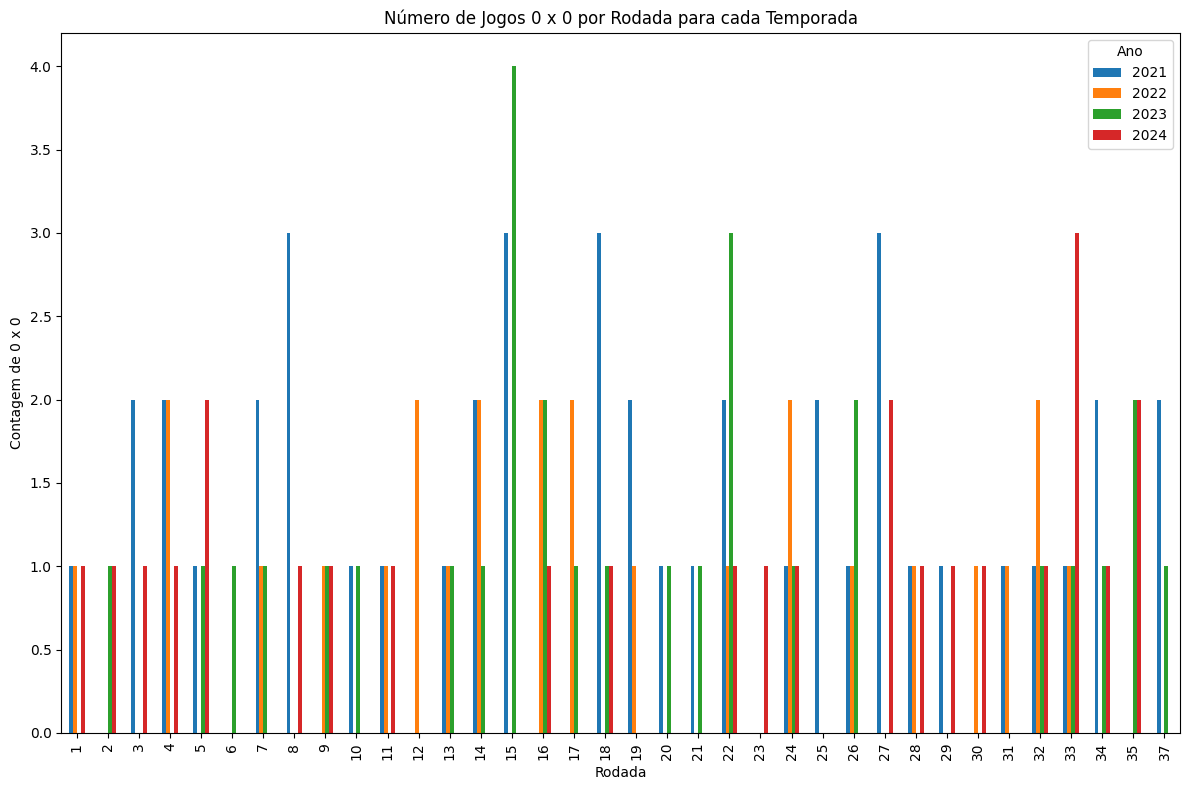

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Filtra os jogos cujo placar seja "0 x 0"
# Utiliza str.strip() para remover espaços extras e garantir a correspondência exata
df_0x0 = df[df["Placar"].str.strip() == "0 x 0"]

# Agrupa os jogos por Ano e Rodada, contando quantos jogos terminaram em 0 x 0
contagem_por_ano_rodada = df_0x0.groupby(["Ano", "Rodada"]).size().reset_index(name="Count")

print("Contagem de 0 x 0 por temporada (Ano) e Rodada:")
print(contagem_por_ano_rodada)

# Cria uma tabela pivô para visualizar separadamente por temporada
tabela_pivot = contagem_por_ano_rodada.pivot(index="Rodada", columns="Ano", values="Count")
print("\nTabela pivô (Rodada x Ano):")
print(tabela_pivot)

# Opcional: Plotar a contagem de 0 x 0 por rodada para cada temporada
tabela_pivot.plot(kind="bar", figsize=(12,8))
plt.title("Número de Jogos 0 x 0 por Rodada para cada Temporada")
plt.xlabel("Rodada")
plt.ylabel("Contagem de 0 x 0")
plt.legend(title="Ano")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("brasileiro_variaveis_historicas.csv")

# Cria uma coluna datetime combinando as colunas "Data" e "Hora"
# É importante que o formato das colunas esteja consistente (ex.: Data no formato "YYYY-MM-DD" ou "DD/MM/YYYY")
df["Data_Hora"] = pd.to_datetime(df["Data"] + " " + df["Hora"], errors="coerce")

# Ordena o DataFrame por Ano, Rodada e Data_Hora para definir a ordem cronológica dos jogos
df.sort_values(by=["Ano", "Rodada", "Data_Hora"], inplace=True)

# Cria uma coluna que indica a ordem do jogo dentro de cada rodada (1º jogo, 2º jogo, etc.)
df["ordem_na_rodada"] = df.groupby(["Ano", "Rodada"]).cumcount() + 1

# Filtra os jogos que terminaram em "0 x 0"
# Usamos str.strip() para remover eventuais espaços extras
df["is_0x0"] = df["Placar"].str.strip() == "0 x 0"

# Agora, para cada rodada, iremos verificar:
# Se a rodada possui pelo menos 2 jogos 0x0, em que posição ocorreu o segundo 0x0
# E, a partir desse ponto, qual a proporção dos jogos restantes que também terminaram em 0x0

resultados = []
for (ano, rodada), grupo in df.groupby(["Ano", "Rodada"]):
    # Reseta o índice para garantir a numeração sequencial na rodada
    grupo = grupo.reset_index(drop=True)
    total_jogos_rodada = len(grupo)
    
    # Encontra os índices (ordem) dos jogos que terminaram em 0x0
    indices_0x0 = grupo.index[grupo["is_0x0"]].tolist()
    
    # Se nesta rodada ocorreram pelo menos 2 jogos 0x0
    if len(indices_0x0) >= 2:
        # Pegamos o índice do segundo jogo 0x0 (primeiro é indices_0x0[0], segundo é indices_0x0[1])
        idx_segundo_0x0 = indices_0x0[1]
        
        # Seleciona os jogos que ocorreram após o segundo jogo 0x0
        jogos_restantes = grupo.loc[idx_segundo_0x0 + 1:]
        
        # Conta quantos desses jogos restantes terminaram em 0x0
        count_restantes_0x0 = jogos_restantes["is_0x0"].sum()
        total_restantes = len(jogos_restantes)
        
        # Calcula a proporção de 0x0 nos jogos seguintes
        prop_restantes_0x0 = (count_restantes_0x0 / total_restantes) if total_restantes > 0 else None
        
        resultados.append({
            "Ano": ano,
            "Rodada": rodada,
            "total_jogos_rodada": total_jogos_rodada,
            "qtde_0x0_rodada": len(indices_0x0),
            "ordem_segundo_0x0": idx_segundo_0x0 + 1,  # +1 para usar numeração 1-based
            "jogos_depois_segundo_0x0": total_restantes,
            "qtde_0x0_depois_segundo": int(count_restantes_0x0),
            "proporcao_0x0_depois_segundo": prop_restantes_0x0
        })

# Converter o resultado para um DataFrame para visualização
df_resultados = pd.DataFrame(resultados)
print("Resultados da análise por rodada:")
print(df_resultados)


Resultados da análise por rodada:
     Ano  Rodada  total_jogos_rodada  qtde_0x0_rodada  ordem_segundo_0x0  \
0   2021       3                  10                2                  7   
1   2021       4                  10                2                  7   
2   2021       7                  10                2                  6   
3   2021       8                  10                3                  7   
4   2021      14                  10                2                  2   
5   2021      15                  10                3                  7   
6   2021      18                  10                3                  7   
7   2021      19                  10                2                  6   
8   2021      22                  10                2                 10   
9   2021      25                  10                2                 10   
10  2021      27                  10                3                  8   
11  2021      34                  10                2 

C:\Users\msdof\AppData\Local\Temp\ipykernel_22524\3708054661.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Data_Hora"] = pd.to_datetime(df["Data"] + " " + df["Hora"], errors="coerce")
